<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Keras_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(weights='imagenet')

102981632/102967424 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16_model = VGG16(weights='imagenet')

553476096/553467096 [==============================] - 3s 0us/step


In [ ]:
vgg16_model.save('/content/drive/MyDrive/AFW/vgg16_Model.h5')

In [ ]:
def predict(image_path, IMG_SIZE=224):
    image = Image.open(image_path)
    # resize image to target size
    image = image.resize((IMG_SIZE, IMG_SIZE))
    image = np.asarray(image)
    image = np.expand_dims(image, axis=0)

    # Predict image using model
    resp = vgg16_model.predict(image)
    # Get top predicted class label
    return decode_predictions(resp, top=1)[0][0]

## Save model

In [ ]:
import shutil
import os
from tensorflow.keras.models import load_model
# save model
model.save('/content/drive/MyDrive/AFW/resnet50_Model.h5')
print('Model Saved!')
 
# load model
savedModel=load_model('/content/drive/MyDrive/AFW/resnet50_Model.h5')
savedModel.summary()

Model Saved!


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
!wget "https://c.pxhere.com/photos/71/7f/airliner_aero_show_aeroplane_flight_plane_jet_aviation_transportation-1088872.jpg!d"

--2022-08-09 17:50:35--  https://c.pxhere.com/photos/71/7f/airliner_aero_show_aeroplane_flight_plane_jet_aviation_transportation-1088872.jpg!d
Resolving c.pxhere.com (c.pxhere.com)... 104.22.0.132, 104.22.1.132, 172.67.31.13, ...
Connecting to c.pxhere.com (c.pxhere.com)|104.22.0.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102239 (100K) [image/jpeg]
Saving to: ‘airliner_aero_show_aeroplane_flight_plane_jet_aviation_transportation-1088872.jpg!d’

airliner_aero_show_ 100%[===================>]  99.84K   624KB/s    in 0.2s    

2022-08-09 17:50:35 (624 KB/s) - ‘airliner_aero_show_aeroplane_flight_plane_jet_aviation_transportation-1088872.jpg!d’ saved [102239/102239]



In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import decode_predictions
def predict(image_path, IMG_SIZE=224):
    image = Image.open(image_path)
    # resize image to target size
    image = image.resize((IMG_SIZE, IMG_SIZE))
    image = np.asarray(image)
    image = np.expand_dims(image, axis=0)

    # Predict image using model
    resp = model.predict(image)
    # Get top predicted class label
    return decode_predictions(resp, top=1)[0][0]

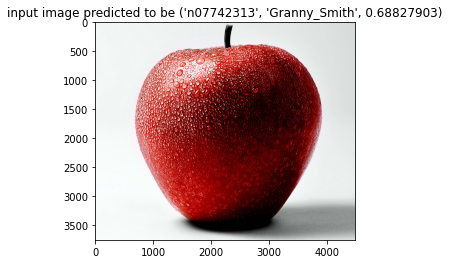

In [ ]:
image_path = "/content/red-apple-with-water-droplets.jpg"
label = predict(image_path)
plt.imshow(Image.open(image_path))
plt.title(f"input image predicted to be {label}")
plt.show()

In [ ]:
shutil.move("/content/lion.jpeg","/content/drive/MyDrive/AFW")

'/content/drive/MyDrive/AFW/lion.jpeg'

## Define function to process the image

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.models import load_model
import json


def preprocess_function(image_path,IMG_SIZE=224):
    image = Image.open(image_path)
    # resize image to target size
    image = image.resize((IMG_SIZE, IMG_SIZE))
    image = np.asarray(image)
    image = np.expand_dims(image, axis=0)
    return image

def predict_function(input_data, model):
    
    # Predict image using model
    resp = model.predict(input_data)
    # Get top predicted class label
    return decode_predictions(resp, top=1)[0][0]

def model_load_function(model_file):
    # load model
    model=load_model(model_file)#'/content/drive/MyDrive/AFW/resnet50_Model.h5'
    print(model.summary())
    return model
def postprocess_function(predictions):
    labels = predictions[1]
    pred_proba = predictions[2]
    
    print("Output label", labels)
    print(f"prediction probability {pred_proba}")
    return json.dumps({"response": "Predicted class is: {}".format(labels)})


if __name__ == "__main__":
    model_file = "/content/drive/MyDrive/AFW/resnet50_Model.h5"
    image_path = "/content/drive/MyDrive/AFW/airliner_aero_show_aeroplane_flight_plane_jet_aviation_transportation-1088872.jpg!d"
    input_data = preprocess_function(image_path)
    model = model_load_function(model_file)
    prediction = predict_function(input_data, model)
    output = postprocess_function(prediction)

    print(output)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           